# Heading 1
## Heading 2
* bullet
Body

# Requirements
Packages used in this file
* jupyter
* sqlite3
* pandas
* matplotlib
* sqlalchemy

## Database notes
* This sample db can be found at: https://www.sqlitetutorial.net/sqlite-sample-database/

### Table list
* albums
* artists
* customers
* employees
* genres
* invoice_items
* invoices
* media_types
* playlist_track
* playlists
* tracks

In [1]:
from datetime import datetime as dt
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# from sqlalchemy import create_engine

# set up graph sizing
%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

def create_connection(db_file):
    """
    create a database connection to the SQLite database specified by the db_file
    
    parameters
    -----------
    db_file: database file
    
    returns
    -------
    Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    return conn

# Table Views

## customers
Some insightful description once you've understood the data

In [ ]:
# connect to db, run query and store in dataframe
db_file = 'data/chinook.db'
conn = create_connection(db_file)
sql = 'select * from customers'
df = pd.read_sql(sql, conn)
conn.close()

In [3]:
df.info()  # check available fields and types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [4]:
df.head()  # can specify int for rows, defaults to 5

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


### category, measure, and date grouping
When familiarizing yourself with new data, it's helpful to break up the fields into chunks so you can understand it more holistically.  Grouping date fields, categories, and measures is often helpful.  Metadata (like db upload modify dates, etc) can also be separated.  In the end, the data will determine how you will be able to group it.

In [5]:
df.columns  # returns column names as a list, handy for copy/paste

Index(['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City',
       'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email',
       'SupportRepId'],
      dtype='object')

In [6]:
categories = ['CustomerId', 'FirstName', 'LastName', 'Country']
df[categories].head()

,CustomerId,FirstName,LastName,Country
0,1,Luís,Gonçalves,Brazil
1,2,Leonie,Köhler,Germany
2,3,François,Tremblay,Canada
3,4,Bjørn,Hansen,Norway
4,5,František,Wichterlová,Czech Republic


#### Check that data!
Let's check to see if there is a 1-to-1 relationship between customers and their various attributes!  If we're going to join this with other data, we want to make sure there's no duplications that occur when matching it up.

In [7]:
agg = df.groupby(categories).count()
agg.head()

,,,,Company,Address,City,State,PostalCode,Phone,Fax,Email,SupportRepId
CustomerId,FirstName,LastName,Country,,,,,,,,,
1,Luís,Gonçalves,Brazil,1,1,1,1,1,1,1,1,1
2,Leonie,Köhler,Germany,0,1,1,0,1,1,0,1,1
3,François,Tremblay,Canada,0,1,1,1,1,1,0,1,1
4,Bjørn,Hansen,Norway,0,1,1,0,1,1,0,1,1
5,František,Wichterlová,Czech Republic,1,1,1,0,1,1,1,1,1


This checks that there isn't a count of more than 1 for each type of customer data we have in the customer table

In [8]:
# loop through all measures and see if they contain values greater than 1
for column in agg.columns:
    check = agg[agg[column] > 1]
    if len(check) > 0:
        print(f'{column} has more than 1 count')
    else:
        print(f'{column} is good!')

Company is good!
Address is good!
City is good!
State is good!
PostalCode is good!
Phone is good!
Fax is good!
Email is good!
SupportRepId is good!


Let's see how much data we have for people in each category

<AxesSubplot:>

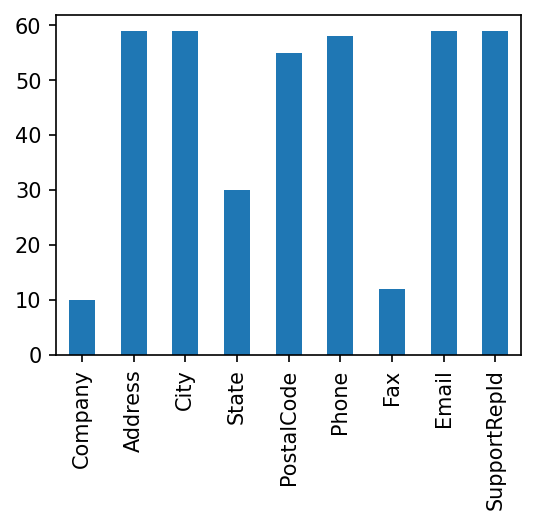

In [9]:
graph = agg.sum()
graph.plot(kind='bar')

# Activities
#### What else can we find in this data?  
* Which cities have the most customers?

#### Can we create additional insightful fields from this data?
* Can missing state data be filled in using other available data?

#### Can this data be linked to other data in the database?
* Check ID fields and see if they are present in other tables

In [10]:
df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [11]:
gmail = df[df['Email'].str.contains('gmail')][['LastName', 'FirstName']]
not_gmail = df[~df['Email'].str.contains('gmail')]
not_gmail.head()
gmail.head()

,LastName,FirstName
2,Tremblay,François
5,Holý,Helena
21,Leacock,Heather
23,Ralston,Frank
27,Barnett,Julia


In [12]:
# 1
(df.groupby('City')
     [['CustomerId']].count()
     .sort_values('CustomerId',
                  ascending=False)
     .head(10))

# 2


# 3

,CustomerId
City,
Mountain View,2
Berlin,2
Paris,2
London,2
São Paulo,2
Prague,2
Salt Lake City,1
Orlando,1
Oslo,1


## invoices
Put insightful information here once you have analyzed table

In [13]:
conn = create_connection('data/chinook.db')
sql = 'select * from invoices'
invoices = pd.read_sql(sql, conn)
conn.close()

In [14]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          412 non-null    int64  
 1   CustomerId         412 non-null    int64  
 2   InvoiceDate        412 non-null    object 
 3   BillingAddress     412 non-null    object 
 4   BillingCity        412 non-null    object 
 5   BillingState       210 non-null    object 
 6   BillingCountry     412 non-null    object 
 7   BillingPostalCode  384 non-null    object 
 8   Total              412 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 29.1+ KB


### Data types note
Look at the InvoiceDate's Dtype!  It's showing as an object.  This often means a string - and we want it to be a datetime object so we can do additional calculations later.  It'll also help graphing tools intelligently decide how many ticks to make for months, years, etc.

In [15]:
# convert InvoiceDate to correct dtype
invoices['InvoiceDate'] = pd.to_datetime(invoices['InvoiceDate'])
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceId          412 non-null    int64         
 1   CustomerId         412 non-null    int64         
 2   InvoiceDate        412 non-null    datetime64[ns]
 3   BillingAddress     412 non-null    object        
 4   BillingCity        412 non-null    object        
 5   BillingState       210 non-null    object        
 6   BillingCountry     412 non-null    object        
 7   BillingPostalCode  384 non-null    object        
 8   Total              412 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 29.1+ KB


In [16]:
# what time period are we looking at with this data?
invoices['InvoiceDate'].describe(datetime_is_numeric=True)

count                              412
mean     2011-06-26 08:05:49.514563072
min                2009-01-01 00:00:00
25%                2010-03-27 00:00:00
50%                2011-06-22 12:00:00
75%                2012-09-26 06:00:00
max                2013-12-22 00:00:00
Name: InvoiceDate, dtype: object

### invoices join fields
Note that we have a field name in the invoices table that matches the field name in the customers table - CustomerID

In [17]:
# creating a list to use as a filter for viewing data we are focused on
invoices_filter = ['CustomerId', 'InvoiceId', 'Total', 'InvoiceDate']
invoices[invoices_filter].head()

,CustomerId,InvoiceId,Total,InvoiceDate
0,2,1,1.98,2009-01-01
1,4,2,3.96,2009-01-02
2,8,3,5.94,2009-01-03
3,14,4,8.91,2009-01-06
4,23,5,13.86,2009-01-11


In [18]:
invoices.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11,69 Salem Street,Boston,MA,USA,2113,13.86


In [19]:
# uses filters to remove unneeded fields from df and invoices when merging
cs_invoices = (invoices[invoices_filter]
                   .merge(df[categories], 
                          how='left', 
                          on='CustomerId'))
cs_invoices.head()

,CustomerId,InvoiceId,Total,InvoiceDate,FirstName,LastName,Country
0,2,1,1.98,2009-01-01,Leonie,Köhler,Germany
1,4,2,3.96,2009-01-02,Bjørn,Hansen,Norway
2,8,3,5.94,2009-01-03,Daan,Peeters,Belgium
3,14,4,8.91,2009-01-06,Mark,Philips,Canada
4,23,5,13.86,2009-01-11,John,Gordon,USA


In [20]:
# invoice_items, tracks
sql = 'select InvoiceId, TrackId, UnitPrice from invoice_items'

conn = create_connection(db_file)
invoice_items = pd.read_sql(sql, conn)
conn.close()
invoice_items.head()

,InvoiceId,TrackId,UnitPrice
0,1,2,0.99
1,1,4,0.99
2,2,6,0.99
3,2,8,0.99
4,2,10,0.99


In [21]:
sql = 'select Name, TrackId, AlbumId, Composer from tracks'

conn = create_connection(db_file)
tracks = pd.read_sql(sql, conn)
conn.close()
tracks.head()

,Name,TrackId,AlbumId,Composer
0,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson"
1,Balls to the Wall,2,2,None
2,Fast As a Shark,3,3,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,Restless and Wild,4,3,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,Princess of the Dawn,5,3,Deaffy & R.A. Smith-Diesel


In [22]:
track_invoices = tracks.merge(invoice_items, how='left', on='TrackId')
track_invoices.head()

,Name,TrackId,AlbumId,Composer,InvoiceId,UnitPrice
0,For Those About To Rock (We Salute You),1,1,"Angus Young, Malcolm Young, Brian Johnson",108.0,0.99
1,Balls to the Wall,2,2,None,1.0,0.99
2,Balls to the Wall,2,2,None,214.0,0.99
3,Fast As a Shark,3,3,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",319.0,0.99
4,Restless and Wild,4,3,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",1.0,0.99


In [23]:
graph = (track_invoices.groupby('Composer')
             [['UnitPrice']].sum()
             .sort_values(by='UnitPrice', 
                          ascending=False))
graph.head()

,UnitPrice
Composer,
Steve Harris,57.42
U2,32.67
Billy Corgan,22.77
Titãs,21.78
Bill Berry-Peter Buck-Mike Mills-Michael Stipe,21.78


### Activities
* Now that we have joined these datasets, what insights can we get?
* Can we add additional fields to get insights from this data?

In [24]:
# reorientate fields for readability
cs_invoices = cs_invoices[['InvoiceDate', 'Country', 'FirstName', 'LastName', 'CustomerId', 'InvoiceId', 'Total']]
cs_invoices.head()

,InvoiceDate,Country,FirstName,LastName,CustomerId,InvoiceId,Total
0,2009-01-01,Germany,Leonie,Köhler,2,1,1.98
1,2009-01-02,Norway,Bjørn,Hansen,4,2,3.96
2,2009-01-03,Belgium,Daan,Peeters,8,3,5.94
3,2009-01-06,Canada,Mark,Philips,14,4,8.91
4,2009-01-11,USA,John,Gordon,23,5,13.86


In [25]:
# add monthly and yearly fields for aggregation, and combine names
cs_invoices['Month'] = (cs_invoices['InvoiceDate'].dt.strftime('%Y-%m-01'))
cs_invoices['Month'] = pd.to_datetime(cs_invoices['Month'])
cs_invoices['Year'] = cs_invoices['InvoiceDate'].dt.strftime('%Y-01-01')
cs_invoices['Year'] = pd.to_datetime(cs_invoices['Year'])
cs_invoices['Customer'] = cs_invoices['LastName'] + ', ' + cs_invoices['FirstName']
cs_invoices.head()

,InvoiceDate,Country,FirstName,LastName,CustomerId,InvoiceId,Total,Month,Year,Customer
0,2009-01-01,Germany,Leonie,Köhler,2,1,1.98,2009-01-01,2009-01-01,"Köhler, Leonie"
1,2009-01-02,Norway,Bjørn,Hansen,4,2,3.96,2009-01-01,2009-01-01,"Hansen, Bjørn"
2,2009-01-03,Belgium,Daan,Peeters,8,3,5.94,2009-01-01,2009-01-01,"Peeters, Daan"
3,2009-01-06,Canada,Mark,Philips,14,4,8.91,2009-01-01,2009-01-01,"Philips, Mark"
4,2009-01-11,USA,John,Gordon,23,5,13.86,2009-01-01,2009-01-01,"Gordon, John"


In [26]:
# look at a single customer
cs = cs_invoices[cs_invoices['CustomerId'] == 5]
cs.head()

,InvoiceDate,Country,FirstName,LastName,CustomerId,InvoiceId,Total,Month,Year,Customer
76,2009-12-08,Czech Republic,František,Wichterlová,5,77,1.98,2009-12-01,2009-01-01,"Wichterlová, František"
99,2010-03-12,Czech Republic,František,Wichterlová,5,100,3.96,2010-03-01,2010-01-01,"Wichterlová, František"
121,2010-06-14,Czech Republic,František,Wichterlová,5,122,5.94,2010-06-01,2010-01-01,"Wichterlová, František"
173,2011-02-02,Czech Republic,František,Wichterlová,5,174,0.99,2011-02-01,2011-01-01,"Wichterlová, František"
294,2012-07-26,Czech Republic,František,Wichterlová,5,295,1.98,2012-07-01,2012-01-01,"Wichterlová, František"


<AxesSubplot:>

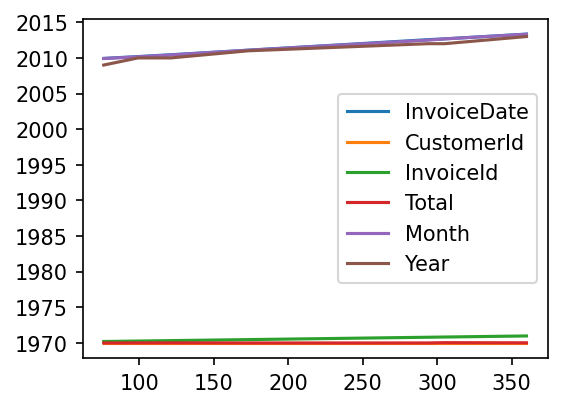

In [27]:
cs.plot()

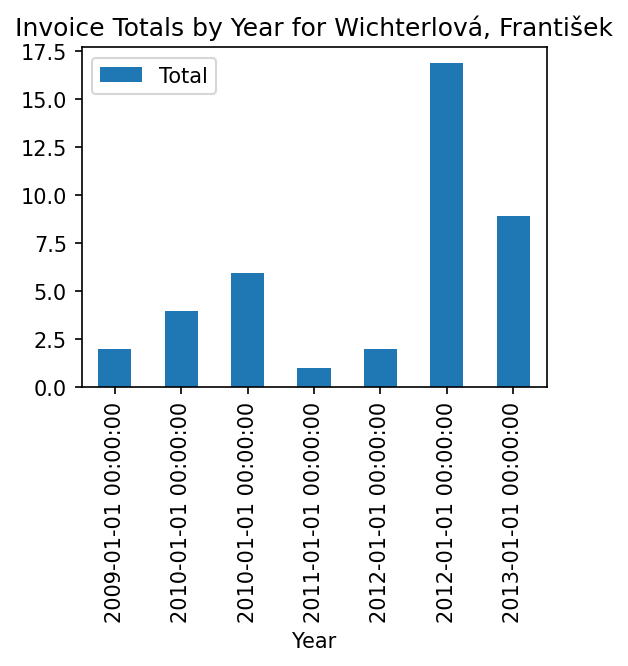

In [28]:
graph = (cs.set_index('Year')[['Total']]
            .plot(title='Invoice Totals by Year for Wichterlová, František', 
                  kind='bar'))
# optional exercise: can you figure out how to modify the x-axis date display?

## Let's zoom out!
We looked closely at an individual, but how about from a different point of view?  Which countries have our most active customers?

In [29]:
# what are the top 10 countries with the most invoices?
graph = (cs_invoices.groupby('Country')[['Total']]
         .count()
         .sort_values('Total')
         .tail(10))

graph = (cs_invoices.groupby('Country')[['Total']]
         .count()
         .sort_values('Total', ascending=False)
         .head(10))

In [30]:
sql = 'select * from invoice_items'



sql = 'select * from tracks'

<AxesSubplot:title={'center':'Number of Invoices by Country'}, ylabel='Country'>

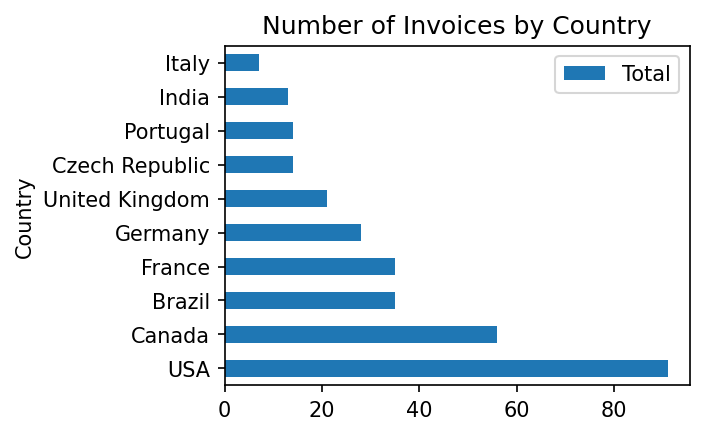

In [31]:
graph.plot(kind='barh',
           title='Number of Invoices by Country')

<AxesSubplot:title={'center':'FY12 Q1 Invoice Totals by Country'}, ylabel='Country'>

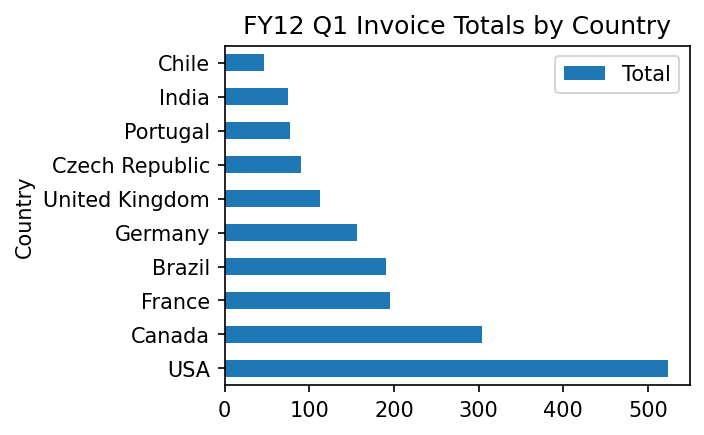

In [32]:
# filter down to a subset of months
graph = cs_invoices[(cs_invoices['Month'] >= '2011-04-01') 
                    & (cs_invoices['Month'] < '2011-07-01')]
graph = (cs_invoices.groupby('Country')[['Total']]
         .sum()
         .sort_values('Total', ascending=False)
         .head(10))
graph.plot(kind='barh',
           title='FY12 Q1 Invoice Totals by Country')

## Activity
Can we join another set of data to find out what items were selling the most in the USA?

# Object Mapping with Databases
There's another way to pull data out of databases that doesn't involve SQL!  By using the database schema, tools have been developed that allow us to view databases in a way that is universal, regardless of the database we are working on.  So whether it's MySQL, Postgres, SQLite, etc, we can use the same code to pull the data.  Here, we'll use SQLAlchemy.

In [33]:
import sqlalchemy as db
engine = db.create_engine(f'sqlite:///{db_file}')
connection = engine.connect()
metadata = db.MetaData()
customers = db.Table('customers', metadata, autoload=True, autoload_with=engine)

In [34]:
# Print the column names
print(customers.columns.keys())

['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId']


In [35]:
# Print full table metadata
print(repr(metadata.tables['customers']))

Table('customers', MetaData(bind=None), Column('CustomerId', INTEGER(), table=<customers>, primary_key=True, nullable=False), Column('FirstName', NVARCHAR(length=40), table=<customers>, nullable=False), Column('LastName', NVARCHAR(length=20), table=<customers>, nullable=False), Column('Company', NVARCHAR(length=80), table=<customers>), Column('Address', NVARCHAR(length=70), table=<customers>), Column('City', NVARCHAR(length=40), table=<customers>), Column('State', NVARCHAR(length=40), table=<customers>), Column('Country', NVARCHAR(length=40), table=<customers>), Column('PostalCode', NVARCHAR(length=10), table=<customers>), Column('Phone', NVARCHAR(length=24), table=<customers>), Column('Fax', NVARCHAR(length=24), table=<customers>), Column('Email', NVARCHAR(length=60), table=<customers>, nullable=False), Column('SupportRepId', INTEGER(), ForeignKey('employees.EmployeeId'), table=<customers>), schema=None)


In [36]:
#Equivalent to 'SELECT * FROM customers'
query = db.select([customers])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()
ResultSet[:5]  # show first 5 results, similar to pandas .head method

[(1, 'Luís', 'Gonçalves', 'Embraer - Empresa Brasileira de Aeronáutica S.A.', 'Av. Brigadeiro Faria Lima, 2170', 'São José dos Campos', 'SP', 'Brazil', '12227-000', '+55 (12) 3923-5555', '+55 (12) 3923-5566', 'luisg@embraer.com.br', 3),
 (2, 'Leonie', 'Köhler', None, 'Theodor-Heuss-Straße 34', 'Stuttgart', None, 'Germany', '70174', '+49 0711 2842222', None, 'leonekohler@surfeu.de', 5),
 (3, 'François', 'Tremblay', None, '1498 rue Bélanger', 'Montréal', 'QC', 'Canada', 'H2G 1A7', '+1 (514) 721-4711', None, 'ftremblay@gmail.com', 3),
 (4, 'Bjørn', 'Hansen', None, 'Ullevålsveien 14', 'Oslo', None, 'Norway', '0171', '+47 22 44 22 22', None, 'bjorn.hansen@yahoo.no', 4),
 (5, 'František', 'Wichterlová', 'JetBrains s.r.o.', 'Klanova 9/506', 'Prague', None, 'Czech Republic', '14700', '+420 2 4172 5555', '+420 2 4172 5555', 'frantisekw@jetbrains.com', 4)]

### SQLAlchemy to Pandas DataFrame
Similar to how we used SQL to pull data into DataFrames for manipulation, we can pull from SQLAlchemy objects into DataFrames.

In [37]:
# this is one way to pull after having used the steps above
df_customer = pd.DataFrame(ResultSet)
df_customer.head()  # oh no where's our column headers?

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [38]:
df_customer = pd.DataFrame(ResultSet,
                           columns=customers.columns.keys())  # add column headers
df_customer.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


# Links

## Pandas
* Pandas documentation can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/index.html
* Pandas data reshaping: https://pandas.pydata.org/docs/user_guide/reshaping.html
* Pandas graphing: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
* Matplotlib documentation: https://matplotlib.org/contents.html